## Exploratory Data Analysis (EDA)

Exploratory data analysis is a way of visualizing, summarizing and interpreting the information that is hidden in rows and columns. EDA is one of the crucial step in data science that allows us to achieve certain insights ans statistical measure that is essential for business continuity, stackholders and data scientists.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")


**STEP-1: Detailed description and objective of dataset.**

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. 

The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. 

The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. 


**STEP-2: Import Data**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving aspiring_minds_employability_outcomes_2015.xlsx to aspiring_minds_employability_outcomes_2015.xlsx


In [3]:
# Load the dataset and displaying head.i.e, reading first five rows of dataset.
df = pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')
df.head()

Unnamed: 0      ID   Salary  ... extraversion nueroticism openess_to_experience
0      train  203097   420000  ...       0.5269     1.35490               -0.4455
1      train  579905   500000  ...       1.2396    -0.10760                0.8637
2      train  810601   325000  ...       0.1637    -0.86820                0.6721
3      train  267447  1100000  ...      -0.3440    -0.40780               -0.9194
4      train  343523   200000  ...      -1.0697     0.09163               -0.1295

[5 rows x 39 columns]

In [4]:
# Find shape of dataset
df.shape

(3998, 39)

In [5]:
# Find Five Point summary using describe
df.describe()

ID        Salary  ...  nueroticism  openess_to_experience
count  3.998000e+03  3.998000e+03  ...  3998.000000            3998.000000
mean   6.637945e+05  3.076998e+05  ...    -0.169033              -0.138110
std    3.632182e+05  2.127375e+05  ...     1.007580               1.008075
min    1.124400e+04  3.500000e+04  ...    -2.643000              -7.375700
25%    3.342842e+05  1.800000e+05  ...    -0.868200              -0.669200
50%    6.396000e+05  3.000000e+05  ...    -0.234400              -0.094300
75%    9.904800e+05  3.700000e+05  ...     0.526200               0.502400
max    1.298275e+06  4.000000e+06  ...     3.352500               1.822400

[8 rows x 27 columns]

**STEP-3: Pre-processing data and 
Univariate Analysis**

In [6]:
#checking for null values in the dataset
df.isnull().sum().sum()

0

In [7]:
#checking for duplicates in the dataset
dupes = df.duplicated()
sum(dupes)

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

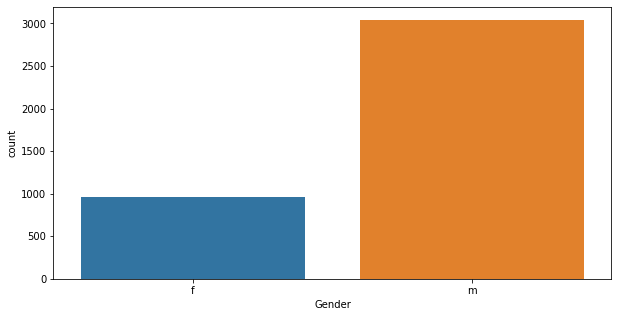

In [10]:
# Count plot for Gender

plt.figure(figsize=(10,5))
ax = sns.countplot(df['Gender'])

It is observed from above graph that males are 3 times higher in count than females.

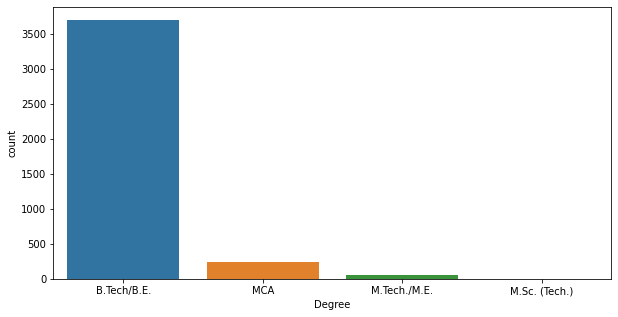

In [11]:
# Count plot for categorical variables. ie, Degree.

plt.figure(figsize=(10,5))
ax = sns.countplot(df['Degree'])

It is observed that most of the employees have done there graduation in B.Tech/B.E, very few from MCA and M.Tech. M.Sc is least opted.

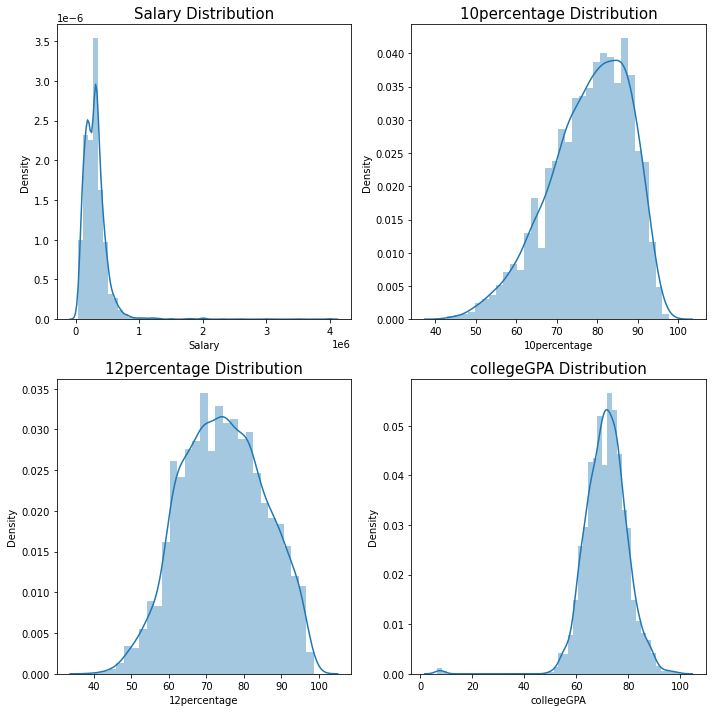

In [12]:
# Univariate Analysis ie, dist plot for continuous variables.

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)
a = sns.distplot(df['Salary'] , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df['10percentage'] , ax=axes[0][1])
a.set_title("10percentage Distribution",fontsize=15)

a = sns.distplot(df['12percentage'] , ax=axes[1][0])
a.set_title("12percentage Distribution",fontsize=15)

a = sns.distplot(df['collegeGPA'] , ax=axes[1][1])
a.set_title("collegeGPA Distribution",fontsize=15)

plt.tight_layout()
plt.show()

Salary is extremely left skewed and looks like log normal distribution.
10Percentage, 12Percentage, collegeGPA are right skewed. 

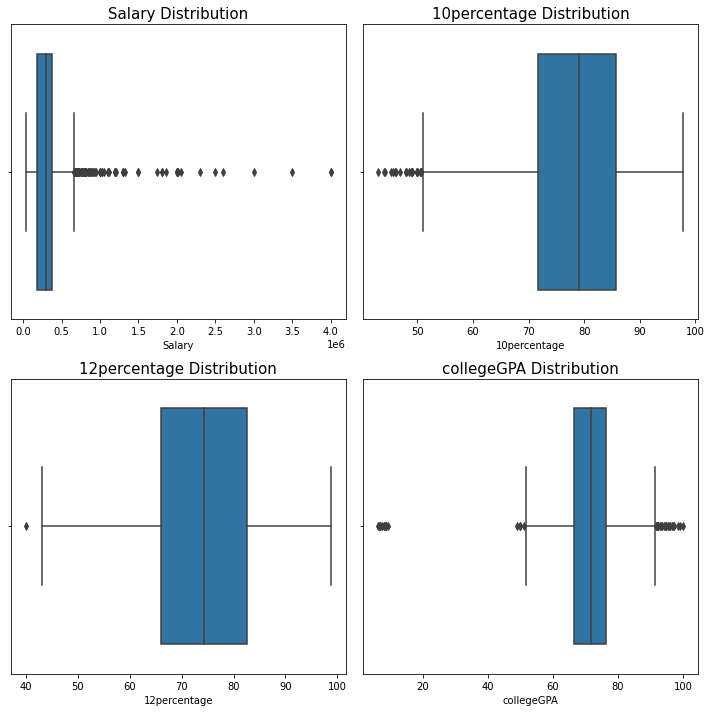

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10, 10)
a = sns.boxplot(df['Salary'] , ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=15)

a = sns.boxplot(df['10percentage'] , ax=axes[0][1])
a.set_title("10percentage Distribution",fontsize=15)

a = sns.boxplot(df['12percentage'] , ax=axes[1][0])
a.set_title("12percentage Distribution",fontsize=15)

a = sns.boxplot(df['collegeGPA'] , ax=axes[1][1])
a.set_title("collegeGPA Distribution",fontsize=15)

plt.tight_layout()
plt.show()

We can observe from above boxplot that all columns are having outliers.
 - For salary column there are extremely high values.
 - For 10Percentage there are few outliers for left i.e, few employess got less than 50%
 - For 12Percentage there are very few outliers to left i.e, few employees got less than 50%
 - For collegeGPA there are outliers on both the sides of boxplot i.e, few employees got more than 90% and few employees got less than 40%.

In [14]:
# Count Plot for specialization.
plt.figure(figsize=(300,150))

ax = sns.countplot(df['Specialization'])
plt.xticks(fontsize=180)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 <a list of 46 Text major ticklabel objects>)

We observe that highest employees are from electronics and communication engineering. Followed by computer science and engineering, Information technology, computer engineering. Next followed by mechanical, EEE, computer application. Almost countable employees are from computer science, electronics, biomedical engineering, networking etc.

(array([   7.,    5.,    7.,   11.,   40.,  127.,  439., 1389., 1536.,
         437.]),
 array([-7.3757 , -6.45589, -5.53608, -4.61627, -3.69646, -2.77665,
        -1.85684, -0.93703, -0.01722,  0.90259,  1.8224 ]),
 <a list of 10 Patch objects>)

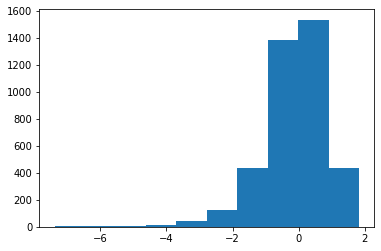

In [15]:
# Histogram plot
plt.hist(df['openess_to_experience'])

## STEP-4 Bivariate Analysis

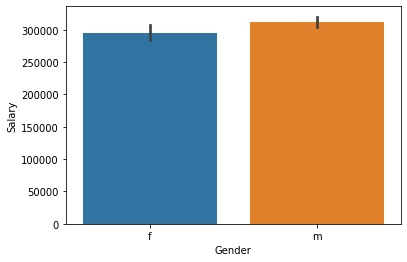

In [16]:
sns.barplot(x= 'Gender', y= 'Salary', data=df)

Salaries for males and females is almost very close. There is no difference with regard to gender in salary.

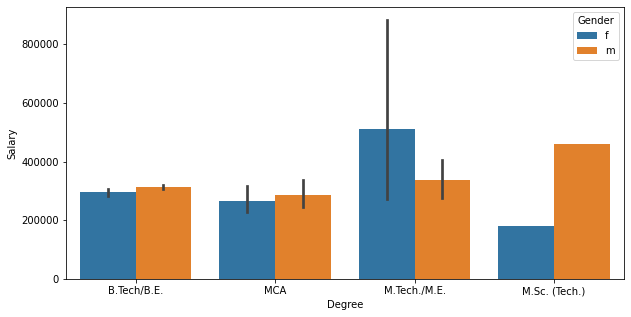

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'Degree', y= 'Salary', hue = 'Gender', data=df)

From this bar plot we observe that M.Tech is done by more females and drawing highest salary than others. M.Sc is done by more males than females.
B.Tech and MCA are chosen equally among males and females and drawing almost same salary.

In [18]:
df['Designation'].unique()

array(['senior quality engineer', 'assistant manager', 'systems engineer',
       'senior software engineer', 'get', 'system engineer',
       'java software engineer', 'mechanical engineer',
       'electrical engineer', 'project engineer', 'senior php developer',
       'senior systems engineer', 'quality assurance engineer',
       'qa analyst', 'network engineer', 'product development engineer',
       'associate software developer', 'data entry operator',
       'software engineer', 'developer', 'electrical project engineer',
       'programmer analyst', 'systems analyst', 'ase',
       'telecommunication engineer', 'application developer',
       'ios developer', 'executive assistant', 'online marketing manager',
       'documentation specialist', 'associate software engineer',
       'management trainee', 'site manager', 'software developer',
       '.net developer', 'production engineer', 'jr. software engineer',
       'trainee software developer', 'ui developer',
       'assi

In [19]:
df_top_20 = df['Designation'].value_counts().nlargest(20).reset_index()
df_top_20

index  Designation
0            software engineer          539
1           software developer          265
2              system engineer          205
3           programmer analyst          139
4             systems engineer          118
5       java software engineer          111
6       software test engineer          100
7             project engineer           77
8   technical support engineer           76
9     senior software engineer           72
10              java developer           67
11               test engineer           57
12               web developer           54
13           assistant manager           52
14       application developer           52
15            network engineer           51
16                data analyst           49
17            business analyst           49
18                    engineer           47
19           android developer           46

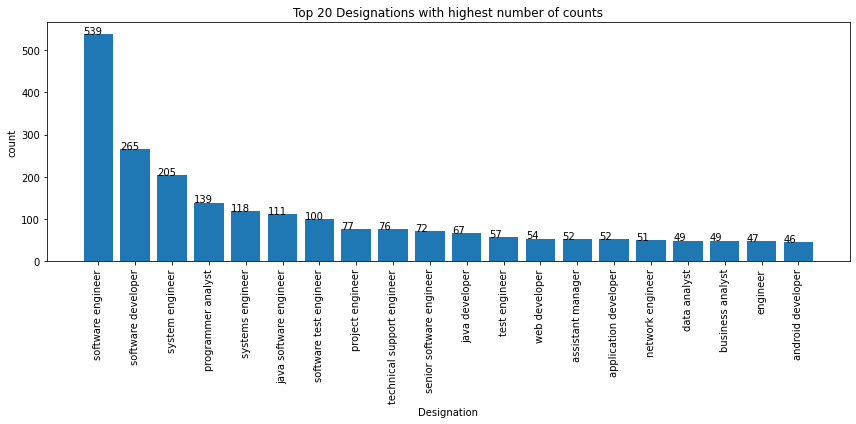

In [20]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Designation'])
plt.title('Top 20 Designations with highest number of counts')
plt.xlabel('Designation')
plt.xticks(rotation=90)
plt.ylabel('count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

This is top 20 count of Designation. Software engineers are having highest count. Followed by software developer, system engineer and so on upto android developer.

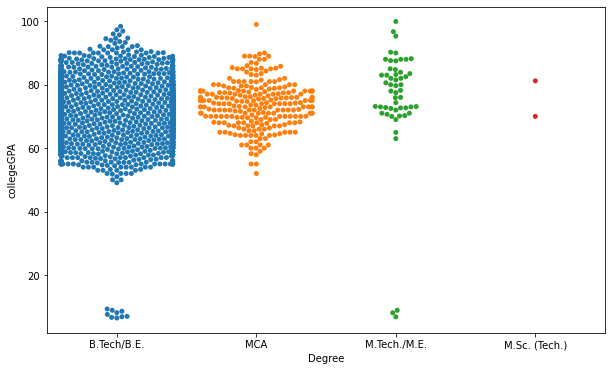

In [21]:
# Swarm Plot For Degree and collegeGPA
plt.figure(figsize=(10,6))
sns.swarmplot(x='Degree', y='collegeGPA', data=df)

By above swarm plot, it is obseved that B.Tech graduates are high and having collegeGPA in range of 60 to 90%. Followed by MCA, having GPA around 80%. M.Tech and M.Sc is chosen by very few employees. M.Tech graduates are having highest GPA compared to all other degrees.

In [22]:
# Barplot for specialization, salary with hue as gender.
plt.figure(figsize=(200,100))
sns.barplot(x= 'Specialization', y= 'Salary', hue = 'Gender', data=df)
plt.xticks(fontsize=100)
plt.xticks(rotation=90)
plt.yticks(fontsize=100)
plt.xlabel('Specialization', fontsize=150)
plt.ylabel('Salary', fontsize= 120)
plt.title('Salary prediction based on specialization and gender', fontsize=150)
plt.show()

Polymer Technology specialization are getting highest salary and it is chosen by only males.

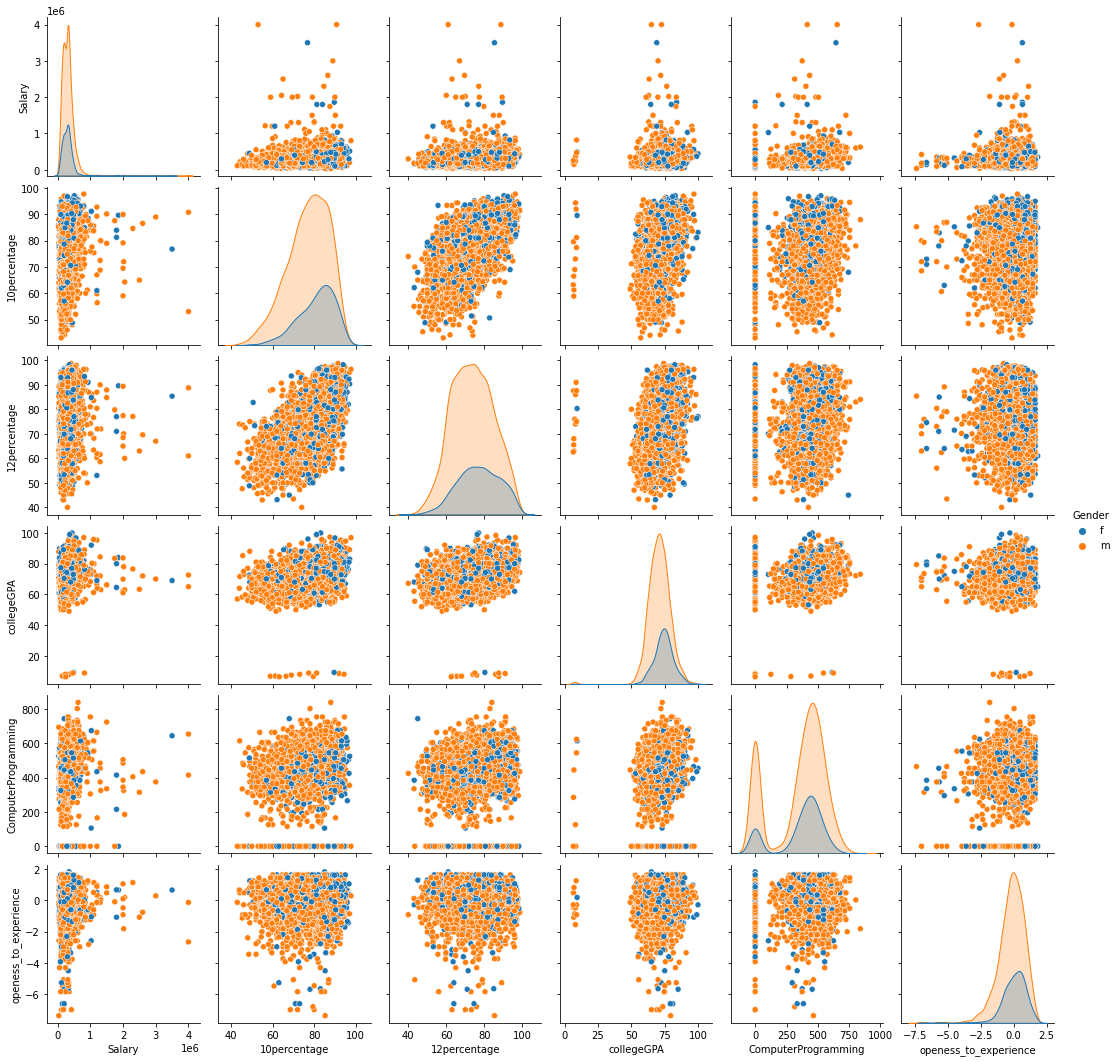

In [23]:
# Multi variate analysis
sns.pairplot(df[['Salary','Gender','10percentage','12percentage','collegeGPA','ComputerProgramming','openess_to_experience']],hue ='Gender')

Pairplot for salary and other  continuous variables is drawn. computer programming is having bi-modal distribution.

In [24]:
## STEP-5: Research Question

## STEP-5: Research Question

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

In [25]:
import random
from scipy.stats import norm, t
from math import sqrt
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [26]:
df1 = df[(df['Designation']=='programmer analyst') | (df['Designation']=='software engineer') |
(df['Designation']=='associate software engineer') | (df['Designation']=='test engineer')]

df2 = df1[['Designation','Salary']]
df2

Designation  Salary
19              software engineer  325000
20              software engineer  320000
21              software engineer  200000
24             programmer analyst  335000
31              software engineer  340000
...                           ...     ...
3981            software engineer  220000
3984            software engineer  480000
3989            software engineer  300000
3993            software engineer  280000
3995  associate software engineer  320000

[781 rows x 2 columns]

In [27]:
## Calculating the Population Mean

pop_mean = df2['Salary'].mean()
pop_mean

334955.185659411

In [28]:
## Calculating the Sample Mean by generating a random values in the population set

samples = random.sample(range(0, df2.shape[0]), 100)
sample_mean = df2.iloc[samples, 1].mean()
print(sample_mean)

323450.0


In [29]:
### Lets find the Standard Deviation of Salary

std = df['Salary'].std()
print(std)

212737.4999568574


In [30]:
### Lets perform the two tailed test to calculate the Z_critical value

confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = norm.ppf(1 - alpha/2) # Left tailed Z score for 95% Confidence Level

print(z_critical)

1.959963984540054


In [31]:
### Defining the Sample and Population Parameters
sample_size = 100
sample_mean = sample_mean
pop_mean = pop_mean
pop_std = std

In [32]:
# z_score for sampling distributions
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [33]:
### Calculating the Z_score 
z = z_score(sample_size, sample_mean, pop_mean, pop_std)
print(z)

-0.5408160602500375


Text(323450.0, 0.0007, 'x_bar')

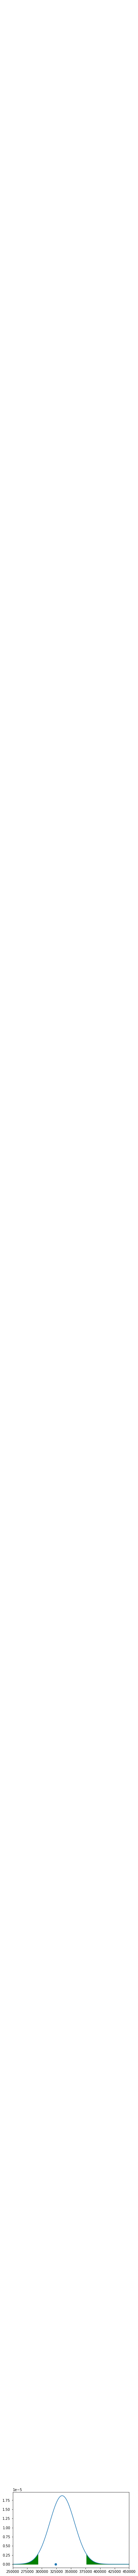

In [34]:
# Defining the x minimum and x maximum
x_min = 250000
x_max = 450000

# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = pop_std/sqrt(sample_size)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values (Two tailed Test)
z_critical_left = pop_mean +(-z_critical * std)
z_critical_right = pop_mean + (z_critical * std)

# Shading the left rejection region
x1 = np.linspace(x_min, z_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='green')

# Shading the right rejection region
x2 = np.linspace(z_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='green')

# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

In [35]:
# Conclusion using z test

if(np.abs(z) > z_critical):
     print("Reject Null Hypothesis")
else:
     print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [36]:
# Conclusion using p value

p_value = 2 * (1.0 - norm.cdf(np.abs(z)))
print("p_value = ", p_value)
if(p_value < alpha):
     print("Reject Null Hypothesis")
else:
     print("Fail to reject Null Hypothesis")

p_value =  0.5886343719485261
Fail to reject Null Hypothesis


Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

In [37]:
## let us check the value count based on Gender

df.Gender.value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [38]:
df.Specialization.value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
information science engineering                 27
electronics and instrumentation engineering     27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

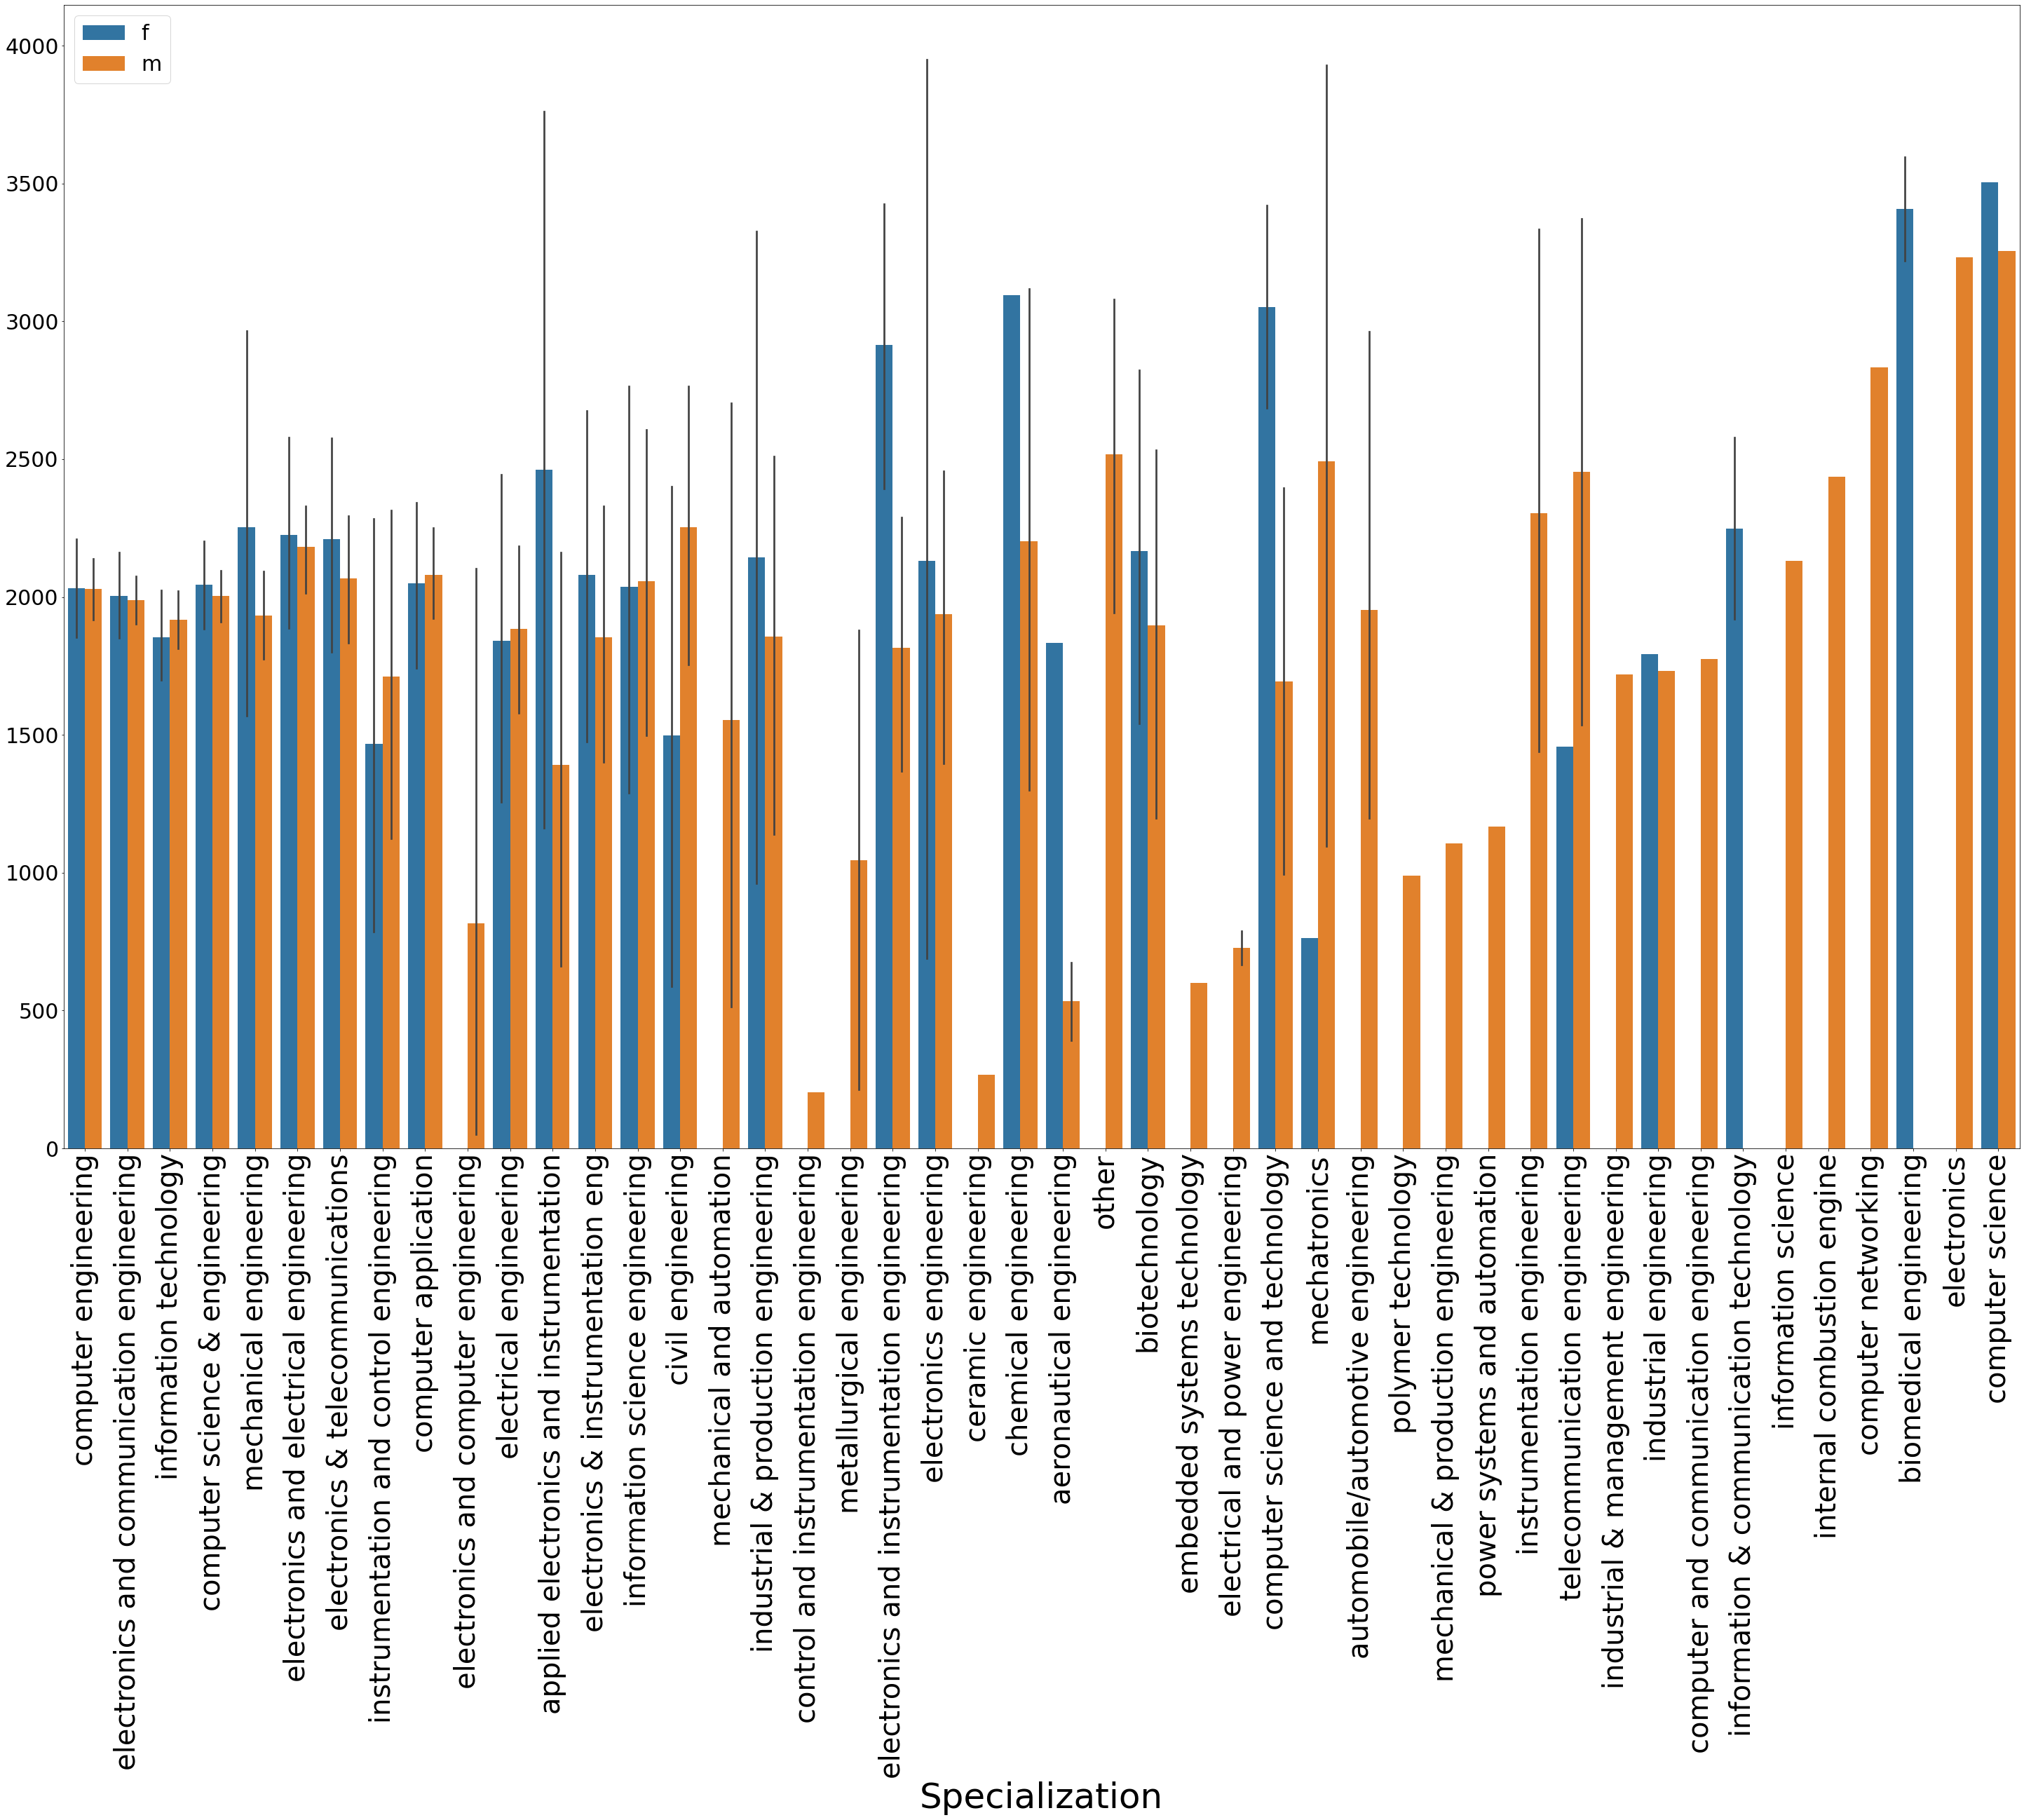

In [39]:
### plotting a graph taking based on specialization and Gender

plt.figure(figsize=(50, 30))
sns.barplot(x='Specialization', y=df.index, data=df, hue='Gender')
plt.xticks(fontsize=40)
plt.xticks(rotation=90)
plt.yticks(fontsize=30)
plt.xlabel('Specialization', fontsize= 50)
plt.legend(fontsize=30)

If we observe from above plot specialization is dependent on gender. Few specializations are only choosen by men they are electronics and computer engineering, mechanical and automation, control and instrumentation engineering, metallurgical engineering, ceramic engg, embedded systems technology, polymer technology, automobile engg, mechanical and production engg, etc.

In [40]:
pd.crosstab(df.Specialization, df.Gender, margins=True)

Gender                                         f     m   All
Specialization                                              
aeronautical engineering                       1     2     3
applied electronics and instrumentation        2     7     9
automobile/automotive engineering              0     5     5
biomedical engineering                         2     0     2
biotechnology                                  9     6    15
ceramic engineering                            0     1     1
chemical engineering                           1     8     9
civil engineering                              6    23    29
computer and communication engineering         0     1     1
computer application                          59   185   244
computer engineering                         175   425   600
computer networking                            0     1     1
computer science                               1     1     2
computer science & engineering               183   561   744
computer science and technology                2     4     6
control and instrumentation engineering        0     1     1
electrical and power engineering               0     2     2
electrical engineering                        17    65    82
electronics                                    0     1     1
electronics & instrumentation eng             10    22    32
electronics & telecommunications              28    93   121
electronics and communication engineering    212   668   880
electronics and computer engineering           0     3     3
electronics and electrical engineering        34   162   196
electronics and instrumentation engineering    5    22    27
electronics engineering                        3    16    19
embedded systems technology                    0     1     1
industrial & management engineering            0     1     1
industrial & production engineering            2     8    10
industrial engineering                         1     1     2
information & communication technology         2     0     2
information science                            0     1     1
information science engineering                8    19    27
information technology                       173   487   660
instrumentation and control engineering        9    11    20
instrumentation engineering                    0     4     4
internal combustion engine                     0     1     1
mechanical & production engineering            0     1     1
mechanical and automation                      0     5     5
mechanical engineering                        10   191   201
mechatronics                                   1     3     4
metallurgical engineering                      0     2     2
other                                          0    13    13
polymer technology                             0     1     1
power systems and automation                   0     1     1
telecommunication engineering                  1     5     6
All                                          957  3041  3998

**Conclusion:**

Exploratory Data Analysis is done on Aspiring minds employability outcomes 2015. Univariate and bivariate analysis is done, insights were provided on every graph. Research question is also done with hypothesis testing.